In [2]:
#!pip uninstall numpy
#!pip install numpy<2
!pip install numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [3]:
df = pd.read_csv('processed.csv')
df.head()

,name,id,lat,lon,cumulative_revenue,design_capacity,capital_cost,project_type,traffic_per_day,target_traffic_per_day,fee_effective_year
0,648,4,21.117914,81.122298,30781.84,8770.533537,464.00,2,22246,22246.0,2021
1,51,5,14.909990,75.279800,263.30,8770.533537,317.69,6,25077,25077.0,2018
2,244,6,15.763110,74.647850,328.40,8770.533537,996.60,2,27249,27249.0,2021
3,179,7,21.214518,81.287962,404.89,15000.000000,123.00,2,20742,20742.0,2021
4,238,8,16.143300,74.516960,164.50,8770.533537,559.49,6,33898,33898.0,2021


Clustering using k-means with categorical and numerical values

In [4]:
"""from sklearn.neighbors import DistanceMetric
import pandas as pd
import numpy as np

def calculate_gower_distance(df):
  
  '''
  Takes a dataframe as an input and returns a gower distance matrix.
  code taken from https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data
  '''

  variable_distances = []
  
  for col in range(df.shape[1]):
    
    feature = df.iloc[:,[col]]
    if feature.dtypes.values == np.object:
      
      feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature, drop_first=True))
        
    else:
      
      feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)


      variable_distances.append(feature_dist)
      

  return np.array(variable_distances).mean(0)"""

"from sklearn.neighbors import DistanceMetric\nimport pandas as pd\nimport numpy as np\n\ndef calculate_gower_distance(df):\n  \n  '''\n  Takes a dataframe as an input and returns a gower distance matrix.\n  code taken from https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data\n  '''\n\n  variable_distances = []\n  \n  for col in range(df.shape[1]):\n    \n    feature = df.iloc[:,[col]]\n    if feature.dtypes.values == np.object:\n      \n      feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature, drop_first=True))\n        \n    else:\n      \n      feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)\n\n\n      variable_distances.append(feature_dist)\n      \n\n  return np.array(variable_distances).mean(0)"

In [5]:
#pip install gower
import gower

dist_matrix = gower.gower_matrix(df)

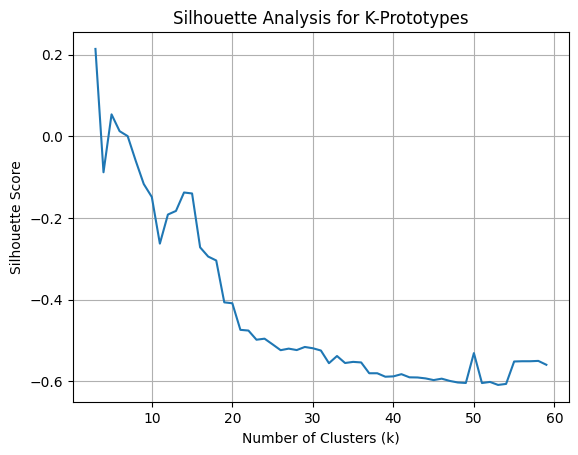

Optimal number of clusters based on Silhouette Score: 3


In [9]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import gower
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has both numerical and categorical columns

# Define a function to perform KModes clustering and calculate silhouette score
def kmodes_silhouette(df, k):
  kmodes = KModes(n_clusters=k, init='random', max_iter=300, random_state=0)
  clusters = kmodes.fit_predict(df)
  dist_matrix = gower.gower_matrix(df)
  silhouette_avg = silhouette_score(dist_matrix, clusters, metric='precomputed')
  return silhouette_avg

# Calculate silhouette scores for a range of k values
silhouette_scores = []
k_range = range(3, 60)  # Adjust the range as needed
for k in k_range:
  silhouette_scores.append(kmodes_silhouette(df.copy(), k))

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Prototypes')
plt.grid(True)
plt.show()

# Use the loop results to choose the optimal k (e.g., based on the elbow method)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

# Perform KModes clustering with the optimal k
kmodes = KModes(n_clusters=optimal_k, init='random', max_iter=300, random_state=0)
clusters = kmodes.fit_predict(df.copy())

# Analyze the clustering results (e.g., visualize clusters, compare characteristics)
# ...

In [10]:
kmodes = KModes(n_clusters=40, init='random', max_iter=300, random_state=0)
clusters = kmodes.fit_predict(df.copy())

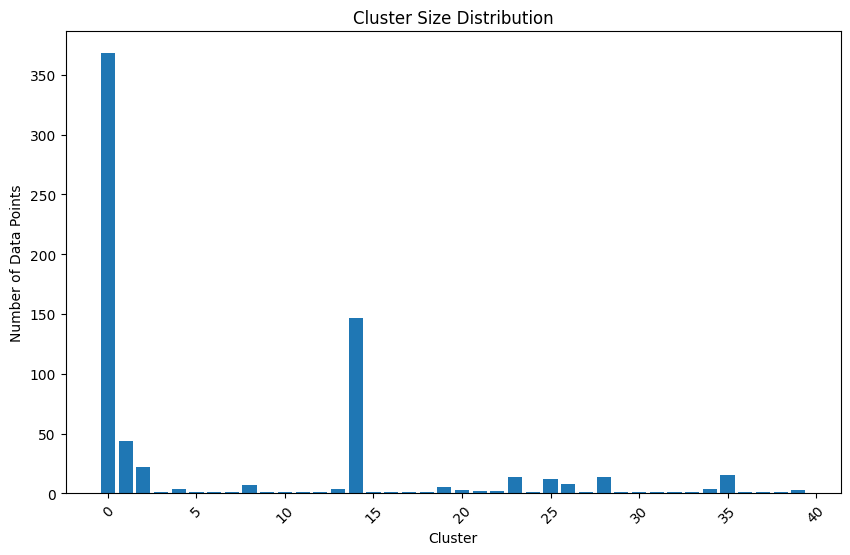

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each cluster label
cluster_counts = pd.Series(clusters).value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Size Distribution')
plt.xticks(rotation=45)
plt.show()

In [15]:
df['cluster'] = clusters

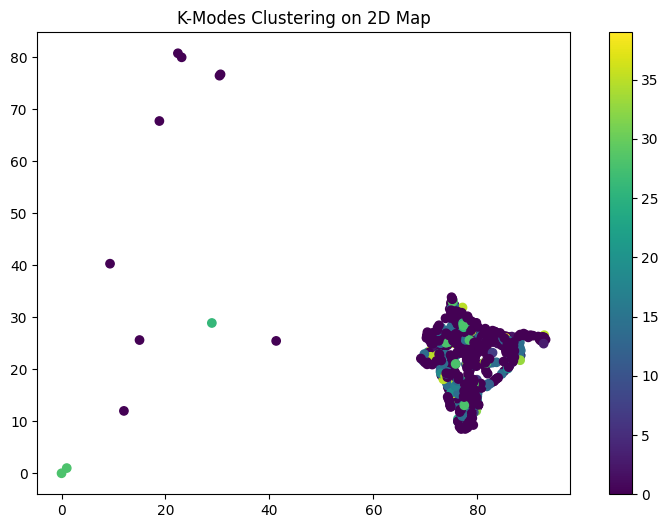

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame with your data and spatial information
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']))

# Create a scatter plot
gdf.plot(column='cluster', cmap='viridis', legend=True, figsize=(10, 6))
plt.title('K-Modes Clustering on 2D Map')
plt.show()

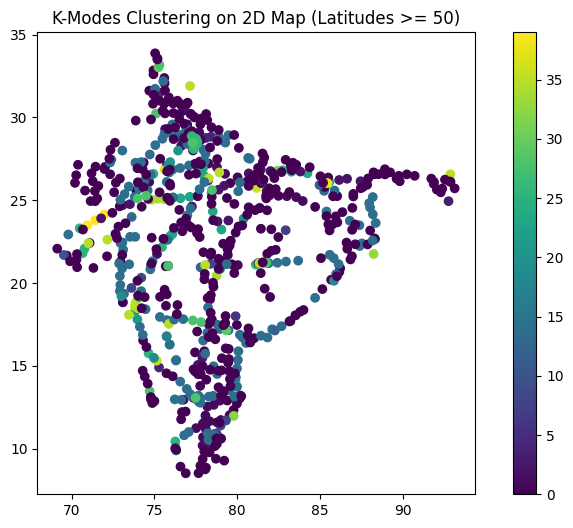

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' has 'lon', 'lat', and 'cluster' columns
# Filter the DataFrame for latitudes above the threshold (50 in this case)
filtered_df = df.loc[df['lon'] >= 50]

# Create a GeoDataFrame with the filtered data
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['lon'], filtered_df['lat']))

# Create a scatter plot with color-coding based on clusters
gdf.plot(column='cluster', cmap='viridis', legend=True, figsize=(10, 6))
plt.title('K-Modes Clustering on 2D Map (Latitudes >= 50)')
plt.show()

In [ ]:
import prince

famd = prince.FAMD(n_components=40, n_iter=100,
                   copy=True, check_input=True,
                   engine='sklearn',random_state=42)

famd = famd.fit(df)
coords = famd.row_coordinates(df)

c:\Users\Krishna\.conda\envs\toll_clustering\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[np.float64(-0.05976143046671968), np.float64(-0.08451542547285165), np.float64(-0.1690308509457033), np.float64(-0.253546276418555), np.float64(-0.15811388300841897), np.float64(-0.2070196678027063), np.float64(-0.18898223650461363), np.float64(-1.5071259308460496), np.float64(-0.1336306209562122), np.float64(-0.9296696802013682), np.float64(-0.39641248358604597), np.float64(-1.1464230084422216), np.float64(-0.10350983390135315), np.float64(-0.8680849201382481)]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
c:\Users\Krishna\.conda\envs\toll_clustering\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[np.float64(-0.05976143046671968), np.float64(-0.08451542547285165), np.float64(-0.1690308509457033), np.float64(-0.253546276418

In [ ]:
coords

component,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.919994,0.145373,0.319989,0.101712,-3.166207,0.129605,0.953788,1.344893,2.265121,-0.012324,...,-2.646055e+00,-1.570389e+00,-4.330515e+00,-7.740402e-01,2.947004e+00,-3.561897e+00,4.045287e+00,-4.068431e+00,-7.302769e-01,3.704868e+00
1,-0.789852,0.092390,-0.630684,16.014254,1.314757,0.037863,2.149984,10.016038,-14.790538,-0.191507,...,8.470157e-01,-2.572456e+00,-5.527564e+00,4.128675e+00,3.615021e+00,2.671073e+00,-6.052997e-02,-2.259394e+00,-5.228613e+00,-2.230864e+00
2,-0.986651,0.170556,0.779490,0.308990,-3.599626,0.150862,1.057482,1.473097,2.607184,-0.026825,...,7.270233e+00,-1.248528e+00,-1.965785e+00,-3.308813e+00,-1.107038e-01,2.580072e+00,4.674385e+00,-1.580419e+00,3.594596e+00,2.512420e+00
3,-0.851128,0.094128,-0.163422,0.023755,-3.057374,0.121240,0.910752,1.301793,2.055763,-0.006558,...,-5.046035e-01,-2.050003e+00,4.241718e+00,-4.249283e+00,-2.674104e+00,5.700723e-01,-5.218659e-01,-3.212830e-01,-3.651098e+00,2.354267e+00
4,-0.749098,-0.012376,-0.270926,-0.800703,1.111156,-0.007784,-0.305407,-0.537655,-0.726350,-0.061236,...,-1.350414e+00,4.479167e+00,5.706299e-01,1.253928e+00,1.455427e+00,-3.988373e-01,6.853136e+00,2.025842e+00,-2.162734e+00,4.630151e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.505895,-0.127933,-0.917394,-0.923381,1.371448,-0.040622,-0.468527,-0.645927,-0.976913,-0.023923,...,1.005388e-11,4.675605e-12,-4.059909e-11,3.285765e-12,-1.256920e-11,9.639855e-12,-2.970073e-12,-1.624299e-11,9.159458e-12,5.386656e-12
696,-0.509993,-0.128464,-0.916518,-0.929336,1.385746,-0.043882,-0.473220,-0.652296,-0.985967,-0.020669,...,1.035729e-11,4.742031e-12,-4.101695e-11,3.546841e-12,-1.268102e-11,9.837423e-12,-3.015217e-12,-1.664198e-11,9.205199e-12,5.378933e-12
697,-0.564428,-0.140980,-0.909726,-1.007527,1.570630,-0.090602,-0.539096,-0.740957,-1.113346,0.025743,...,1.428415e-11,5.596733e-12,-4.636337e-11,6.961016e-12,-1.411118e-11,1.239027e-11,-3.592890e-12,-2.180542e-11,9.779910e-12,5.253444e-12
698,-0.482808,-0.120787,-0.918644,-0.890523,1.294726,-0.019659,-0.439398,-0.606958,-0.920491,-0.044678,...,8.421404e-12,4.320244e-12,-3.839788e-11,1.857828e-12,-1.198122e-11,8.579255e-12,-2.731971e-12,-1.409755e-11,8.928684e-12,5.446428e-12
